In [1]:
import pandas as pd 
import numpy as np 

How are gendered job listings distributed across the US?

In [2]:
%matplotlib notebook

In [3]:
data_set = pd.read_csv("dice_com-job_us_sample.csv")
data_set.drop_duplicates(inplace=True); 

In [4]:
subset = data_set.get(["jobdescription", "joblocation_address"])

In [18]:
numberOfTechJobsWithMoreMasculinePronouns = 0;
numberOfTechJobsWithMoreFemininePronouns = 0; 
masculinePronouns = ['he','him','his']
femininePronouns = ['she','her','hers']
locationsWithMoreMasculinePronouns = []
locationsWithMoreFemininePronouns = []
for index, row in subset.iterrows():
#     for description in data_set.jobdescription: 
    description = row.get("jobdescription")
    numberOfMasulinePronouns = 0
    numberOfFemininePronouns = 0
    for word in description.split(): 
        if word.lower() in masculinePronouns: 
            numberOfMasulinePronouns += 1; 
        if word.lower() in femininePronouns: 
            numberOfFemininePronouns += 1; 
    if numberOfMasulinePronouns > numberOfFemininePronouns: 
        numberOfTechJobsWithMoreMasculinePronouns += 1
        locationsWithMoreMasculinePronouns.append(row.get("joblocation_address"))
    elif numberOfMasulinePronouns < numberOfFemininePronouns: 
        numberOfTechJobsWithMoreFemininePronouns += 1
        locationsWithMoreFemininePronouns.append(row.get("joblocation_address"))


In [6]:
print(len(locationsWithMoreMasculinePronouns))

128


In [7]:
states = pd.read_csv("states.csv")
states = states.get("Code")

statesDict = dict()
for state in list(states): 
    statesDict[state] = 0; 

In [8]:
for loc in locationsWithMoreMasculinePronouns: 
    try: 
        statesDict[loc.split(', ')[1]] += 1; 
    except: 
        print("exception")

exception
exception


In [9]:
statesDict

{'AL': 1,
 'AK': 0,
 'AZ': 0,
 'AR': 0,
 'CA': 26,
 'CO': 0,
 'CT': 3,
 'DE': 0,
 'DC': 1,
 'FL': 1,
 'GA': 10,
 'HI': 0,
 'ID': 0,
 'IL': 8,
 'IN': 1,
 'IA': 0,
 'KS': 1,
 'KY': 1,
 'LA': 0,
 'ME': 1,
 'MD': 2,
 'MA': 9,
 'MI': 1,
 'MN': 2,
 'MS': 0,
 'MO': 2,
 'MT': 0,
 'NE': 0,
 'NV': 1,
 'NH': 0,
 'NJ': 14,
 'NM': 0,
 'NY': 18,
 'NC': 3,
 'ND': 0,
 'OH': 2,
 'OK': 0,
 'OR': 0,
 'PA': 6,
 'RI': 1,
 'SC': 0,
 'SD': 0,
 'TN': 0,
 'TX': 7,
 'UT': 0,
 'VT': 0,
 'VA': 0,
 'WA': 4,
 'WV': 0,
 'WI': 0,
 'WY': 0}

In [10]:
masculine_themed_wording = [
    "competitive",
    "dominate",
    "leader",
    "rock star",
    "rockstar",
    "guru",
    "ninja",
    "hacker",
    "superhero",
    "prove themselves",
    "analyze",
    "determine",
    "crush it",
    "world class",
    "superior",
    "ambitious",
    "aggressive",
    "leader"
]

In [19]:
numberOfTechJobsWithMoreMasculinePronouns = 0;
locationsWithMoreMasculinePronouns = []
for index, row in subset.iterrows():
#     for description in data_set.jobdescription: 
    description = row.get("jobdescription")
    numberOfMasculinePronouns = 0 
    for phrase in masculine_themed_wording: 
        if phrase in description.lower(): 
            numberOfMasculinePronouns += 1
    if numberOfMasculinePronouns > 0: 
        numberOfTechJobsWithMoreMasculinePronouns += 1
        locationsWithMoreMasculinePronouns.append(row.get("joblocation_address"))
# print(locationsWithMoreMasculinePronouns)

In [12]:
statesDict = dict()
for state in list(states): 
    statesDict[state] = 0; 

In [13]:
for loc in locationsWithMoreMasculinePronouns: 
    try: 
        statesDict[loc.split()[-1].upper()] += 1; 
    except: 
        print("exception:",loc)

exception: Sacramento
exception: Montreal, QC
exception: Montreal, QC
exception: Any City
exception: Toronto, ON
exception: Ottawa, ON
exception: Mississauga, ON
exception: Edmonton, AB
exception: Bangkok
exception: Hyderabad
exception: Bangkok
exception: North York, ON
exception: Mississauga, ON
exception: Bangkok
exception: North York, ON
exception: Cherry Hill
exception: San Francisco
exception: Burlington, ON
exception: Toronto, ON
exception: Toronto, ON
exception: Vancouver, BC
exception: Toronto, ON
exception: Montreal, QC
exception: Montreal, QC
exception: Montreal, QC
exception: Montreal, QC
exception: Toronto, ON
exception: Calgary, AB
exception: Markham, ON
exception: Montreal, QC
exception: Reading
exception: Calgary, AB
exception: Quebec City, QC
exception: San Isidro
exception: Montreal, QC
exception: Toronto, ON
exception: Konstanz
exception: Vancouver, BC
exception: Toronto, ON
exception: Montreal, QC
exception: Calgary, AB
exception: Toronto, ON
exception: Toronto, ON
e

In [14]:
statesDict

{'AL': 19,
 'AK': 1,
 'AZ': 67,
 'AR': 2,
 'CA': 1815,
 'CO': 109,
 'CT': 340,
 'DE': 18,
 'DC': 153,
 'FL': 169,
 'GA': 807,
 'HI': 3,
 'ID': 9,
 'IL': 263,
 'IN': 20,
 'IA': 33,
 'KS': 22,
 'KY': 13,
 'LA': 15,
 'ME': 21,
 'MD': 217,
 'MA': 607,
 'MI': 95,
 'MN': 91,
 'MS': 1,
 'MO': 88,
 'MT': 0,
 'NE': 30,
 'NV': 24,
 'NH': 28,
 'NJ': 707,
 'NM': 2,
 'NY': 852,
 'NC': 115,
 'ND': 0,
 'OH': 119,
 'OK': 7,
 'OR': 20,
 'PA': 332,
 'RI': 46,
 'SC': 29,
 'SD': 2,
 'TN': 37,
 'TX': 893,
 'UT': 20,
 'VT': 3,
 'VA': 360,
 'WA': 588,
 'WV': 3,
 'WI': 114,
 'WY': 1}

In [15]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


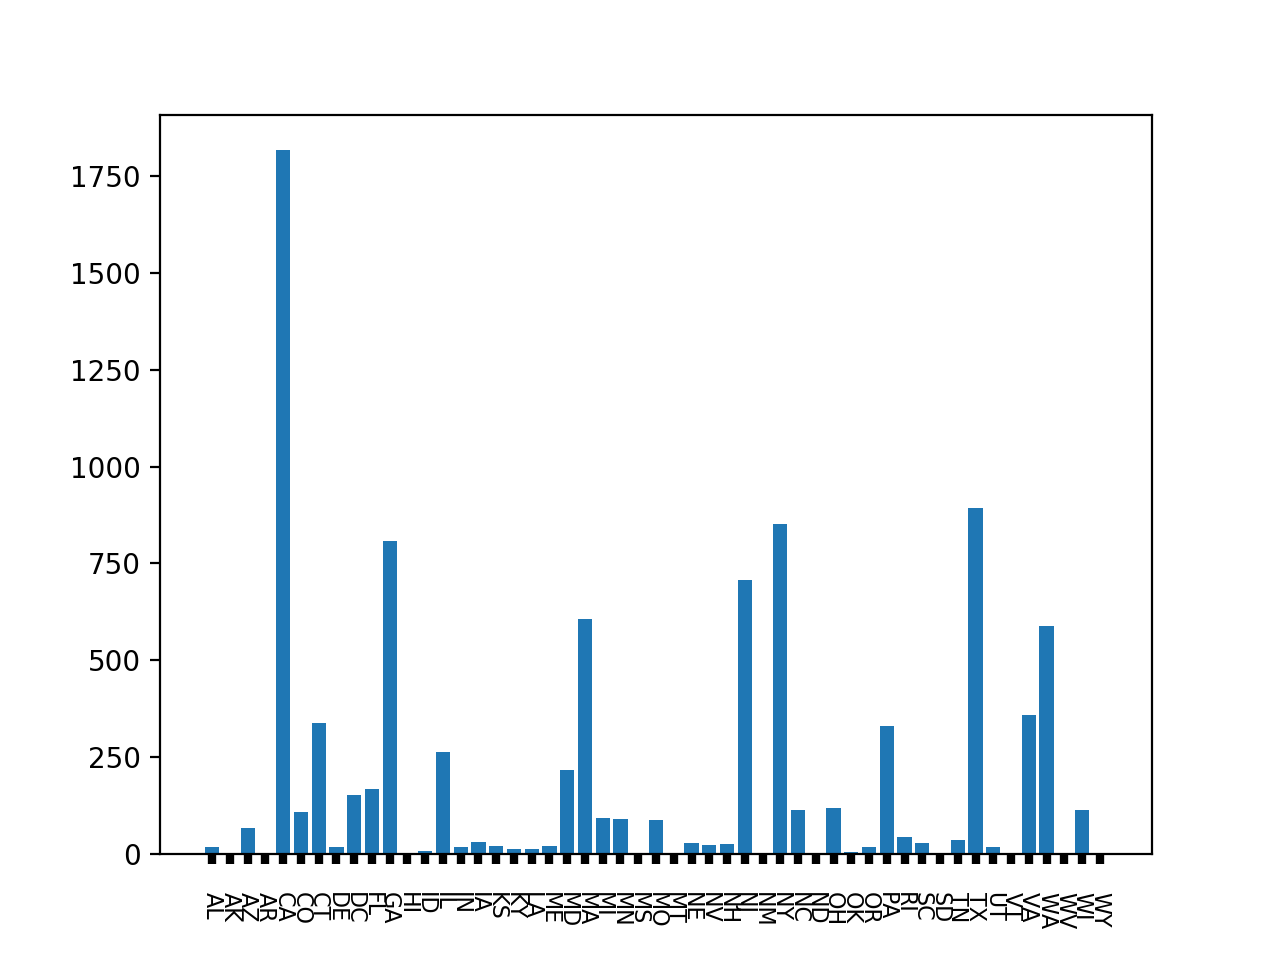

In [16]:
fig , ax = plt.subplots()

<IPython.core.display.Javascript object>


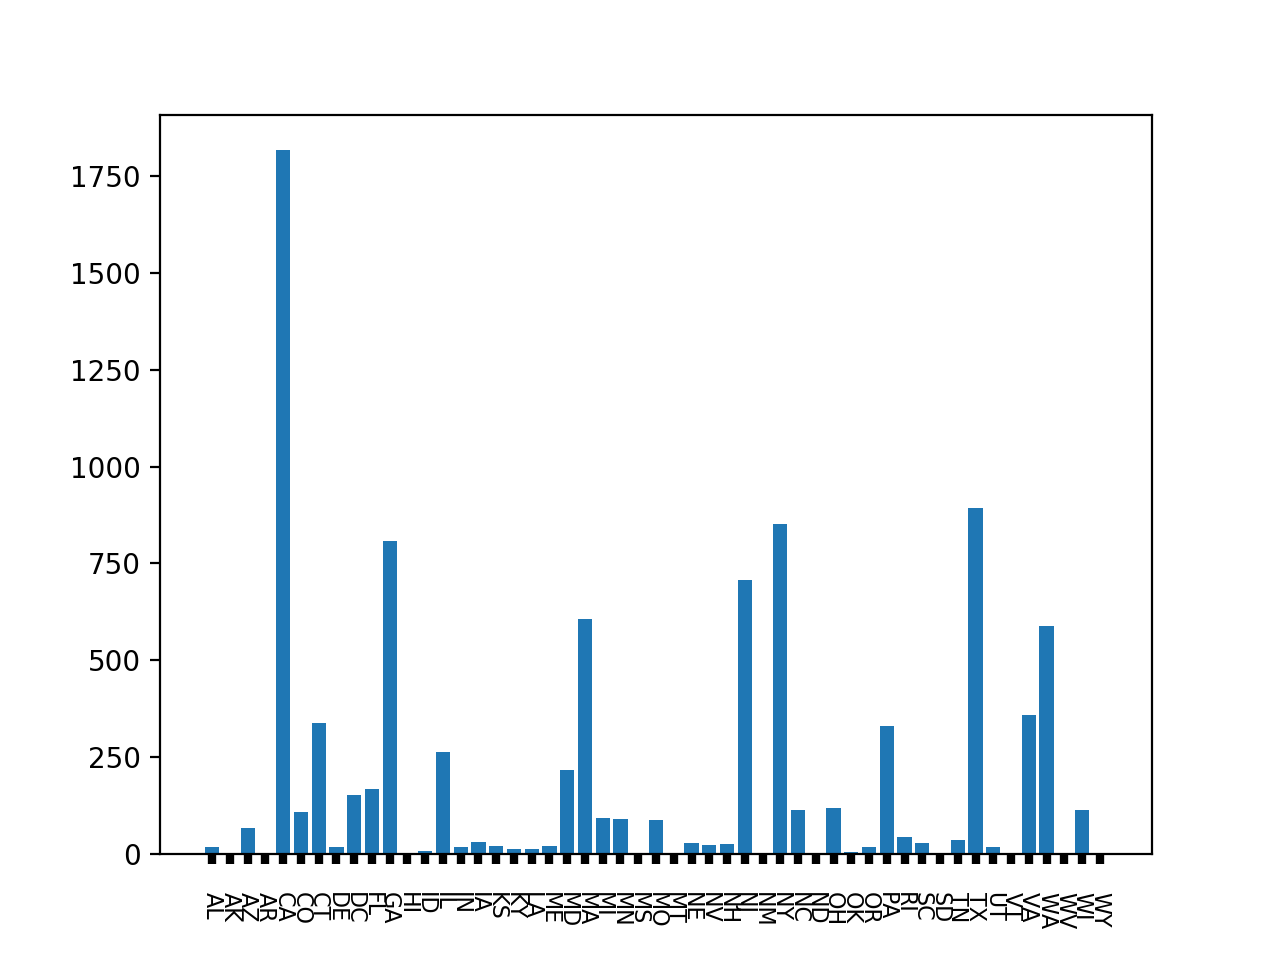

In [17]:
ax.bar(statesDict.keys(), statesDict.values())
ax.tick_params(axis='x', which='major', pad=10, rotation = 270)
ax.tick_params(axis="x", labelsize=8, width=3) 
fig